In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [4]:
df.drop(axis=1, columns=['Unnamed: 0.1','Unnamed: 0'], inplace=True)

In [5]:
df.shape

(7105, 10)

In [6]:
df.columns

Index(['restaurant name', 'restaurant type', 'rate (out of 5)',
       'num of ratings', 'avg cost (two people)', 'online_order',
       'table booking', 'cuisines type', 'area', 'local address'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant name        7105 non-null   object 
 1   restaurant type        7105 non-null   object 
 2   rate (out of 5)        7037 non-null   float64
 3   num of ratings         7105 non-null   int64  
 4   avg cost (two people)  7048 non-null   float64
 5   online_order           7105 non-null   object 
 6   table booking          7105 non-null   object 
 7   cuisines type          7105 non-null   object 
 8   area                   7105 non-null   object 
 9   local address          7105 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 555.2+ KB


In [8]:
df.describe()

,rate (out of 5),num of ratings,avg cost (two people)
count,7037.000000,7105.000000,7048.000000
mean,3.514253,188.921042,540.286464
std,0.463249,592.171049,462.902305
min,1.800000,1.000000,40.000000
25%,3.200000,16.000000,300.000000
50%,3.500000,40.000000,400.000000
75%,3.800000,128.000000,600.000000
max,4.900000,16345.000000,6000.000000


In [9]:
df.dtypes

restaurant name           object
restaurant type           object
rate (out of 5)          float64
num of ratings             int64
avg cost (two people)    float64
online_order              object
table booking             object
cuisines type             object
area                      object
local address             object
dtype: object

In [10]:
df.isnull().sum()

restaurant name           0
restaurant type           0
rate (out of 5)          68
num of ratings            0
avg cost (two people)    57
online_order              0
table booking             0
cuisines type             0
area                      0
local address             0
dtype: int64

In [11]:
((df.isnull().sum())/len(df))*100

restaurant name          0.000000
restaurant type          0.000000
rate (out of 5)          0.957072
num of ratings           0.000000
avg cost (two people)    0.802252
online_order             0.000000
table booking            0.000000
cuisines type            0.000000
area                     0.000000
local address            0.000000
dtype: float64

- Less than 1% is missing

<AxesSubplot:xlabel='rate (out of 5)', ylabel='Count'>

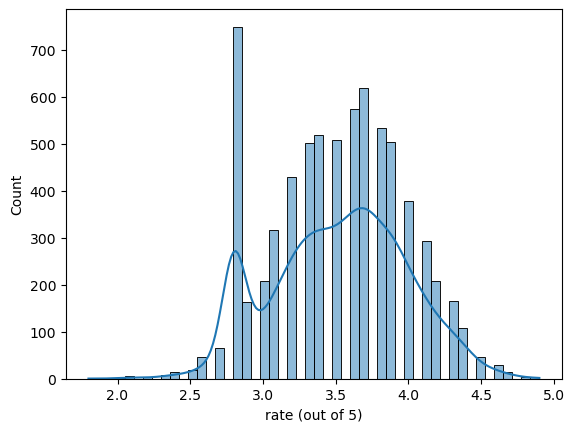

In [12]:
sns.histplot(df['rate (out of 5)'], kde=True)

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rate (out of 5)'>

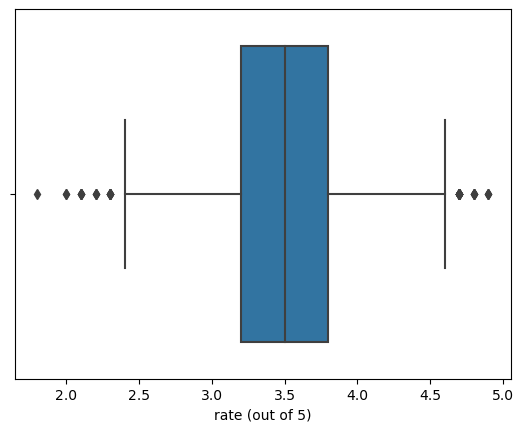

In [13]:
sns.boxplot(df['rate (out of 5)'])

In [14]:
df['rate (out of 5)'].fillna(df['rate (out of 5)'].median(), inplace=True)

<AxesSubplot:xlabel='avg cost (two people)', ylabel='Count'>

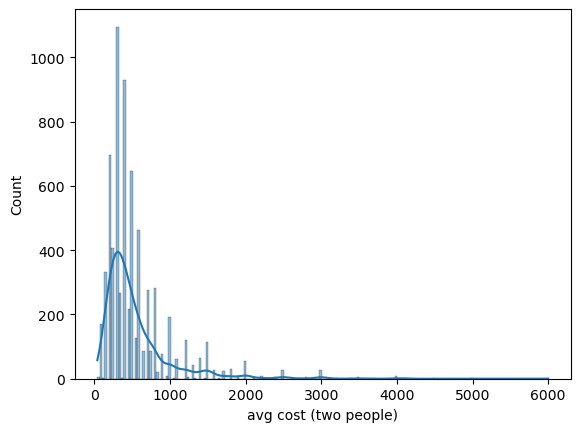

In [15]:
sns.histplot(df['avg cost (two people)'], kde=True)

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg cost (two people)'>

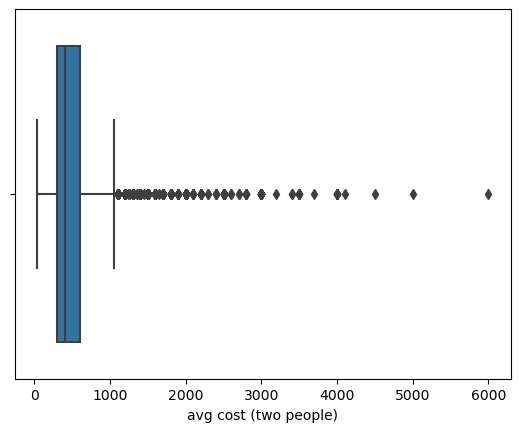

In [16]:
sns.boxplot(df['avg cost (two people)'])

In [17]:
df['avg cost (two people)'].fillna(df['avg cost (two people)'].median(), inplace=True)

In [18]:
df.isnull().sum()

restaurant name          0
restaurant type          0
rate (out of 5)          0
num of ratings           0
avg cost (two people)    0
online_order             0
table booking            0
cuisines type            0
area                     0
local address            0
dtype: int64

### Duplicates

In [19]:
df.duplicated().sum()

0

- No duplicates

### Outliers

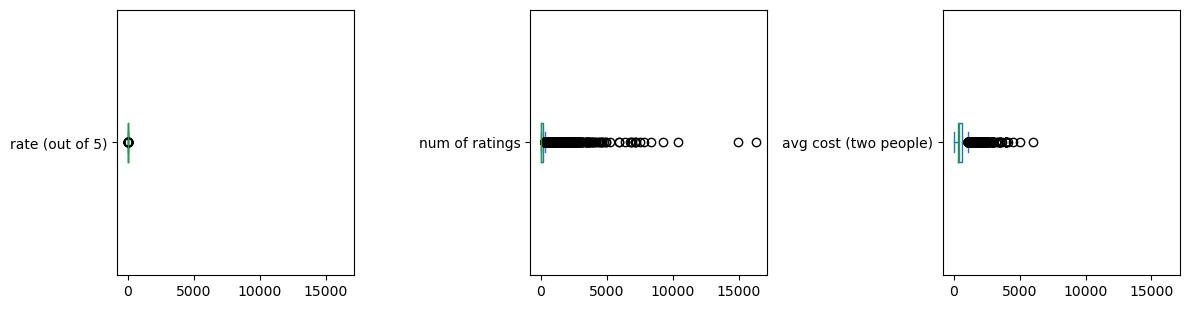

In [20]:
num_col = df.select_dtypes(include=['float64','int64'])

num_col.plot(kind='box', subplots=True, layout=(2,3), figsize=(12,6), vert=False)
plt.tight_layout()
plt.show()

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rate (out of 5)'>

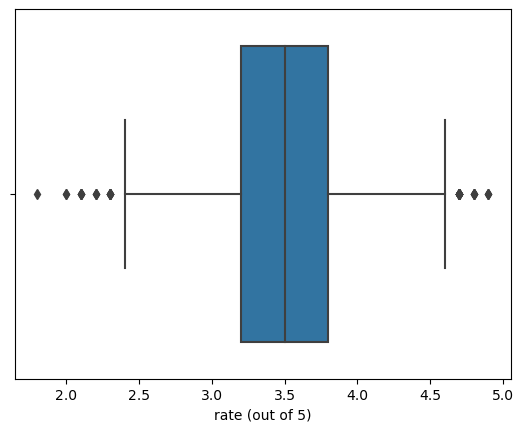

In [21]:
sns.boxplot(df['rate (out of 5)'])

- Realistically Possible

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg cost (two people)'>

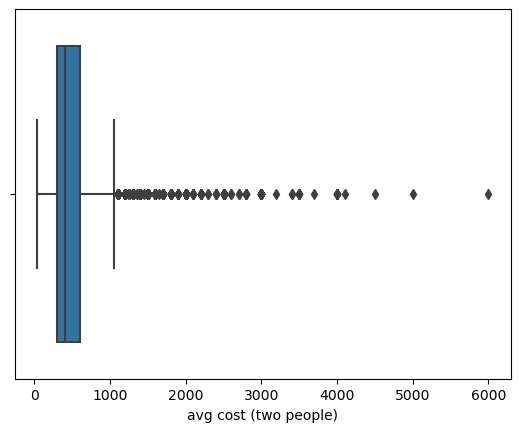

In [22]:
sns.boxplot(df['avg cost (two people)'])

- Realistically Possible

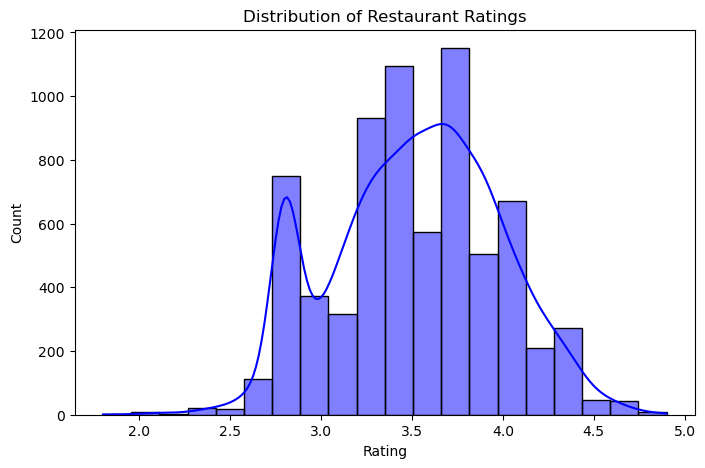

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df["rate (out of 5)"], bins=20, kde=True, color="blue")
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

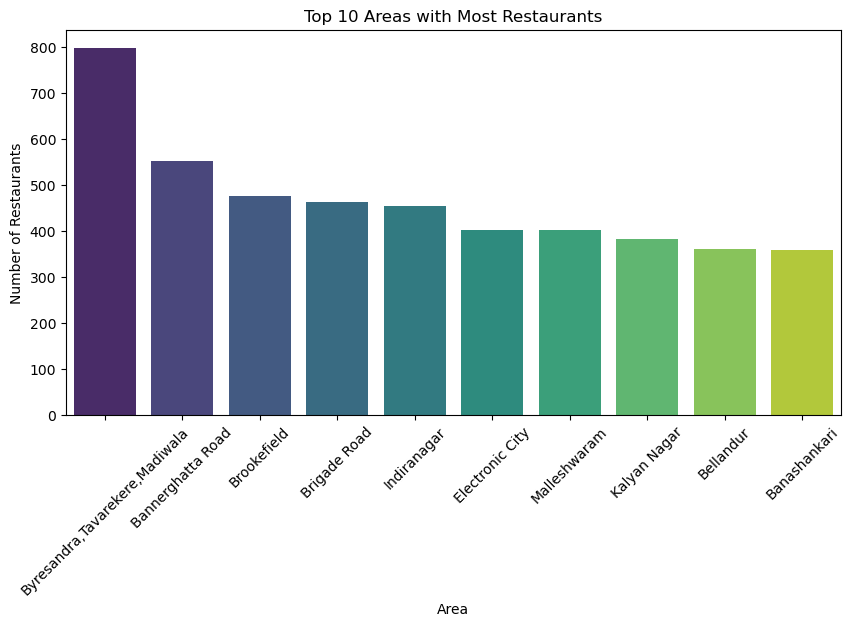

In [26]:
plt.figure(figsize=(10, 5))
top_cities = df["area"].value_counts().head(10)  # Show top 10 cities
sns.barplot(x=top_cities.index, y=top_cities.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Areas with Most Restaurants")
plt.xlabel("Area")
plt.ylabel("Number of Restaurants")
plt.show()

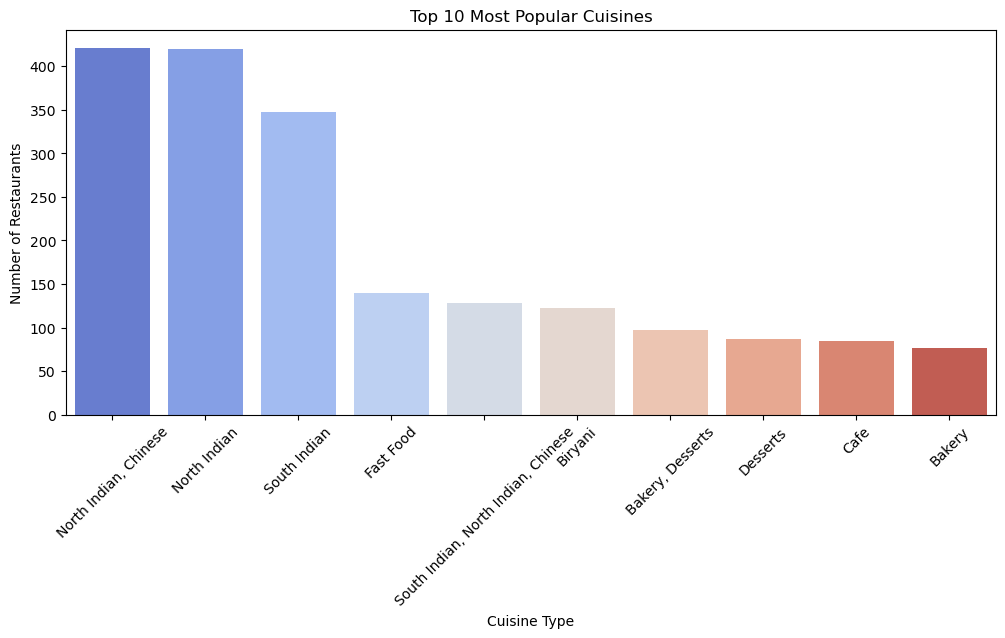

In [27]:
plt.figure(figsize=(12, 5))
top_cuisines = df["cuisines type"].value_counts().head(10)  # Top 10 cuisines
sns.barplot(x=top_cuisines.index, y=top_cuisines.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Most Popular Cuisines")
plt.xlabel("Cuisine Type")
plt.ylabel("Number of Restaurants")
plt.show()

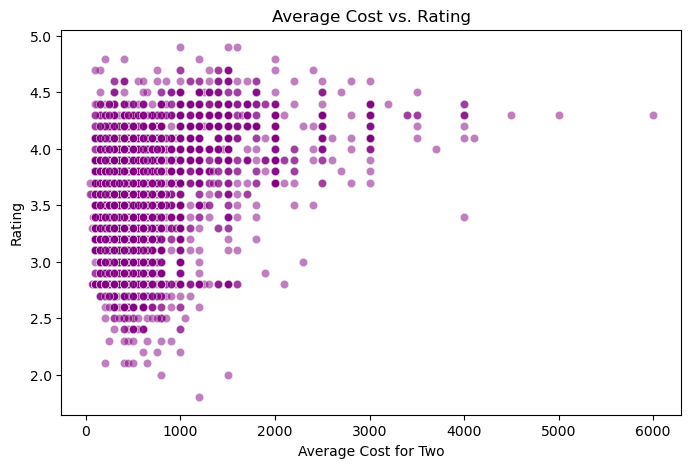

In [29]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["avg cost (two people)"], y=df["rate (out of 5)"], alpha=0.5, color="purple")
plt.title("Average Cost vs. Rating")
plt.xlabel("Average Cost for Two")
plt.ylabel("Rating")
plt.show()

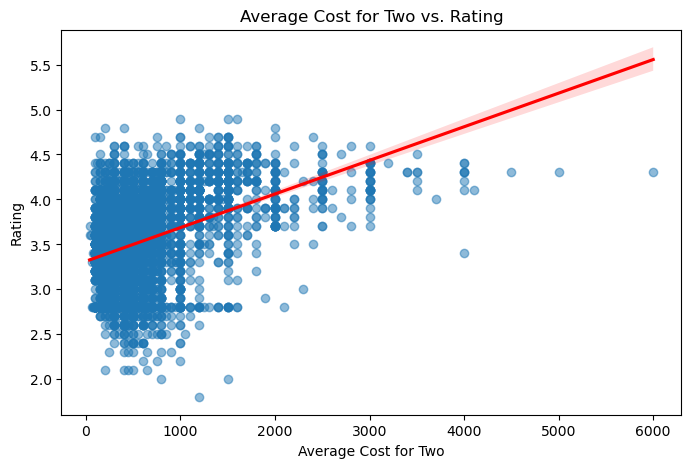

In [30]:
plt.figure(figsize=(8, 5))
sns.regplot(x=df["avg cost (two people)"], y=df["rate (out of 5)"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Average Cost for Two vs. Rating")
plt.xlabel("Average Cost for Two")
plt.ylabel("Rating")
plt.show()